In [1]:
!pip install -Uqq fastbook

In [2]:
from fastai.collab import *
from fastai.tabular.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
a = torch.randn(10, 5)
b = torch.randn(5, 5)
a, b

(tensor([[-1.1778,  0.1161, -0.0189, -0.1570, -0.6625],
         [-0.5325,  1.1027,  1.7167, -0.5538, -1.5694],
         [-0.3993,  1.9265, -1.2798,  2.5873,  0.1928],
         [ 0.4921, -0.4883,  0.7183,  0.4322,  0.6127],
         [-0.3430, -0.5178,  1.0436,  0.3690,  0.3866],
         [ 1.8977,  2.0436,  0.7013,  0.7195,  0.0138],
         [-1.1140,  0.7354,  0.0227, -0.2305, -0.0156],
         [-1.1927,  0.6604,  1.7081,  0.5803, -0.2819],
         [-1.2886, -0.3715,  0.3125,  1.5091,  0.4998],
         [ 1.2481, -1.6825,  1.4363,  0.7094,  0.4248]]),
 tensor([[ 8.7187e-01,  1.3392e+00, -1.1500e+00,  1.0853e+00, -9.5685e-01],
         [ 2.5038e-02,  6.7546e-02, -1.7922e-01, -2.3671e-01, -3.9678e-01],
         [ 8.3442e-01,  8.6981e-01, -1.4006e+00, -9.7612e-02, -1.0028e+00],
         [ 1.3006e+00,  1.7953e+00, -7.9299e-01,  3.7187e-05,  1.2407e+00],
         [ 1.2316e-01, -2.3893e+00,  1.8808e+00, -9.7769e-02, -6.1711e-01]]))

In [4]:
one_hot(2, 10).float()

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
a.t()

tensor([[-1.1778, -0.5325, -0.3993,  0.4921, -0.3430,  1.8977, -1.1140, -1.1927,
         -1.2886,  1.2481],
        [ 0.1161,  1.1027,  1.9265, -0.4883, -0.5178,  2.0436,  0.7354,  0.6604,
         -0.3715, -1.6825],
        [-0.0189,  1.7167, -1.2798,  0.7183,  1.0436,  0.7013,  0.0227,  1.7081,
          0.3125,  1.4363],
        [-0.1570, -0.5538,  2.5873,  0.4322,  0.3690,  0.7195, -0.2305,  0.5803,
          1.5091,  0.7094],
        [-0.6625, -1.5694,  0.1928,  0.6127,  0.3866,  0.0138, -0.0156, -0.2819,
          0.4998,  0.4248]])

In [6]:
a.t() @ one_hot(2, 10).float()

tensor([-0.3993,  1.9265, -1.2798,  2.5873,  0.1928])

In [7]:
a[2]

tensor([-0.3993,  1.9265, -1.2798,  2.5873,  0.1928])

In [8]:
path = untar_data(URLs.ML_100k)
path

Path('/root/.fastai/data/ml-100k')

In [9]:
list(path.glob('*'))

[Path('/root/.fastai/data/ml-100k/ua.test'),
 Path('/root/.fastai/data/ml-100k/u2.test'),
 Path('/root/.fastai/data/ml-100k/u1.test'),
 Path('/root/.fastai/data/ml-100k/u.item'),
 Path('/root/.fastai/data/ml-100k/u3.base'),
 Path('/root/.fastai/data/ml-100k/README'),
 Path('/root/.fastai/data/ml-100k/allbut.pl'),
 Path('/root/.fastai/data/ml-100k/u.occupation'),
 Path('/root/.fastai/data/ml-100k/u.info'),
 Path('/root/.fastai/data/ml-100k/u1.base'),
 Path('/root/.fastai/data/ml-100k/u.data'),
 Path('/root/.fastai/data/ml-100k/u.genre'),
 Path('/root/.fastai/data/ml-100k/ub.base'),
 Path('/root/.fastai/data/ml-100k/mku.sh'),
 Path('/root/.fastai/data/ml-100k/u5.base'),
 Path('/root/.fastai/data/ml-100k/u3.test'),
 Path('/root/.fastai/data/ml-100k/u4.base'),
 Path('/root/.fastai/data/ml-100k/u.user'),
 Path('/root/.fastai/data/ml-100k/ua.base'),
 Path('/root/.fastai/data/ml-100k/ub.test'),
 Path('/root/.fastai/data/ml-100k/u2.base'),
 Path('/root/.fastai/data/ml-100k/u5.test'),
 Path('/r

In [10]:
# with open(path/'/root/.fastai/data/ml-100k/u.data', 'r') as f:
#     print(f.read())

In [11]:
df = pd.read_csv(path/'u.data', sep = '\t', header = None, names = ['user', 'movie', 'rating', 'timestamp'])
df.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
# with open(path/'README', 'r') as f:
#     print(f.read())

In [13]:
movies = pd.read_csv(path/'u.item', sep = '|', encoding = 'latin-1', header = None, usecols = (0, 1), names = ['movie', 'title'])
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
df = df.merge(movies)
df.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [15]:
dls = CollabDataLoaders.from_df(df, item_name = 'title')

In [16]:
dls.show_batch()

,user,title,rating
0,776,"Time to Kill, A (1996)",3
1,851,Star Trek: The Wrath of Khan (1982),4
2,628,Liar Liar (1997),4
3,290,Cool Runnings (1993),4
4,326,Dolores Claiborne (1994),1
5,655,Lover's Knot (1996),3
6,239,Jaws (1975),3
7,605,Amadeus (1984),5
8,314,"Rock, The (1996)",4
9,643,Pretty Woman (1990),3


In [17]:
x, y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [18]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        
    def forward(self, x):
        users = self.user_factors(x[:, 0])
        movies = self.movie_factors(x[:, 1])
        return (users * movies).sum(axis = 1)

In [19]:
len(df.user.unique())

943

In [20]:
len(df.title.unique())

1664

In [21]:
n_users = len(dls.classes['user'])
n_users

944

In [22]:
n_movies = len(dls.classes['title'])
n_movies

1665

In [23]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())

In [24]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.352666,1.288031,00:09
1,1.065468,1.112550,00:08
2,0.961233,0.985087,00:09
3,0.834119,0.900652,00:08
4,0.795108,0.882995,00:08


We can see that some of the predictioins are more than 5 and less than 0. But our ratings range from 0 to 1. So we wil use sigmoid as activation function and we will multiply our sigmoid result by our range and we will get a number in our range. Here we will take our range between o to 5.5. As in sigmoid, we will never get 1. So when we will multiply with range 5, we will never get 5. But we have a category of 5. So we will take the range a little larger, so that we will also get 5.

In [25]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range = (0, 5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:, 0])
        movies = self.movie_factors(x[:, 1])
        return sigmoid_range((users * movies).sum(axis = 1), *self.y_range)

In [26]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.000985,0.990174,00:09
1,0.878374,0.905473,00:09
2,0.696700,0.859302,00:09
3,0.477068,0.863504,00:09
4,0.362724,0.868792,00:09


In [27]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range = (0, 5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range
        self.user_bias = Embedding(n_users, 1)
        self.movie_bias = Embedding(n_movies, 1)
        
    def forward(self, x):
        users = self.user_factors(x[:, 0])
        movies = self.movie_factors(x[:, 1])
        result = (users * movies).sum(axis = 1, keepdim = True)
        result += self.user_bias(x[:, 0]) + self.movie_bias(x[:, 1])
        return sigmoid_range(result, *self.y_range)

In [28]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.943979,0.940502,00:09
1,0.794004,0.859717,00:09
2,0.593454,0.860358,00:10
3,0.402036,0.887548,00:09
4,0.292610,0.894413,00:09


As we can see overfitting in our model. We can't apply augmentation in tabular data. So we can reduce overfitting by weight decay or L2 regularization. Higher weights tend to overfitting and very lower weights tend to worst prediction. So we need to get a regular value. In weight decay we add squared sum of the parameters in the loss and calculate the gradients. So it will reduce the weights. and improve the performance

In [29]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd = 0.1)

epoch,train_loss,valid_loss,time
0,0.968739,0.954795,00:10
1,0.869605,0.876122,00:10
2,0.748562,0.827645,00:09
3,0.599683,0.815645,00:10
4,0.480524,0.816216,00:10


In [30]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd = 0.01)

epoch,train_loss,valid_loss,time
0,0.918128,0.927273,00:09
1,0.812070,0.855491,00:09
2,0.605018,0.862883,00:10
3,0.400576,0.882751,00:10
4,0.285188,0.888345,00:10


In [31]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd = 0.001)

epoch,train_loss,valid_loss,time
0,0.927473,0.937018,00:10
1,0.814733,0.859829,00:10
2,0.588647,0.871732,00:10
3,0.389144,0.902737,00:10
4,0.278936,0.910482,00:10


In [32]:
class T(Module):
    def __init__(self): self.a = torch.ones(3)
        
L(T().parameters())

(#0) []

In [33]:
class T(Module):
    def __init__(self): self.a = nn.Parameter(torch.ones(3))
        
L(T().parameters())

(#1) [Parameter containing:
tensor([1., 1., 1.], requires_grad=True)]

In [34]:
class T(Module):
    def __init__(self): self.a = nn.Linear(1, 3, bias = False)
        
L(T().parameters())

(#1) [Parameter containing:
tensor([[-0.7363],
        [-0.0347],
        [-0.9128]], requires_grad=True)]

In [35]:
t = T()
t

T(
  (a): Linear(in_features=1, out_features=3, bias=False)
)

In [36]:
type(t.a.weight)

torch.nn.parameter.Parameter

In [37]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [38]:
create_params([2, 3])

Parameter containing:
tensor([[ 0.0089,  0.0145, -0.0084],
        [-0.0095,  0.0216,  0.0087]], requires_grad=True)

In [39]:
type(create_params([2, 1]))

torch.nn.parameter.Parameter

In [40]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_features, y_range = (0, 5.5)):
        self.user_factors = create_params([n_users, n_features])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_features])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range
        
    def forward(self, x):
        users  = self.user_factors[x[:, 0]]
        movies = self.movie_factors[x[:, 1]]
        res = (users * movies).sum(axis = 1)
        res += self.user_bias[x[:, 0]] + self.movie_bias[x[:, 1]]
        return sigmoid_range(res, *self.y_range)

In [41]:
model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func = MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd = 0.1)

epoch,train_loss,valid_loss,time
0,0.931937,0.941377,00:10
1,0.827652,0.867502,00:10
2,0.724765,0.831579,00:10
3,0.586868,0.818722,00:10
4,0.473691,0.819149,00:10


In [42]:
movie_bias = learn.model.movie_bias.squeeze()
idxs = movie_bias.argsort()[:5]
[dls.classes['title'][i] for i in idxs]

['Children of the Corn: The Gathering (1996)',
 'Crow: City of Angels, The (1996)',
 'Robocop 3 (1993)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Free Willy 3: The Rescue (1997)']

In [43]:
movie_bias

tensor([ 0.0005, -0.1315, -0.0173,  ..., -0.0721,  0.1061,  0.0276],
       device='cuda:0', grad_fn=<SqueezeBackward0>)

In [44]:
idxs = movie_bias.argsort(descending = True)[:5]
[dls.classes['title'][i] for i in idxs]

["Schindler's List (1993)",
 'Titanic (1997)',
 'Shawshank Redemption, The (1994)',
 'L.A. Confidential (1997)',
 "One Flew Over the Cuckoo's Nest (1975)"]

In [45]:
torch.argsort(tensor([40, 20, 30]))

tensor([1, 2, 0])

In [46]:
df.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [47]:
g = df.groupby('title')['rating'].count()
g

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [48]:
df[df.title == 'Star Wars (1977)'].rating.value_counts()

5    325
4    176
3     57
2     16
1      9
Name: rating, dtype: int64

In [49]:
df[df.title == 'Contact (1997)'].rating.value_counts()

4    212
5    132
3    110
2     43
1     12
Name: rating, dtype: int64

In [50]:
top_movies = g.sort_values(ascending = False).index.values[:1000]

In [51]:
learn.dls.classes['title'].o2i['Til There Was You (1997)'], learn.dls.classes['title'].o2i['1-900 (1994)'], learn.dls.classes['title'].o2i['101 Dalmatians (1996)']

(0, 2, 3)

In [52]:
learn.dls.classes['title'].o2i['#na#']

0

In [53]:
top_idxs = tensor([learn.dls.classes['title'].o2i[i] for i in top_movies])

In [54]:
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()

In [55]:
movie_w.shape

torch.Size([1000, 50])

In [56]:
movie_w.pca(3).shape

torch.Size([1000, 3])

In [57]:
movie_pca = movie_w.pca(3)

In [58]:
fac0, fac1, fac2 = movie_pca.t()

In [59]:
idx = list(range(50))

In [60]:
X = fac0[idx]
Y = fac2[idx]

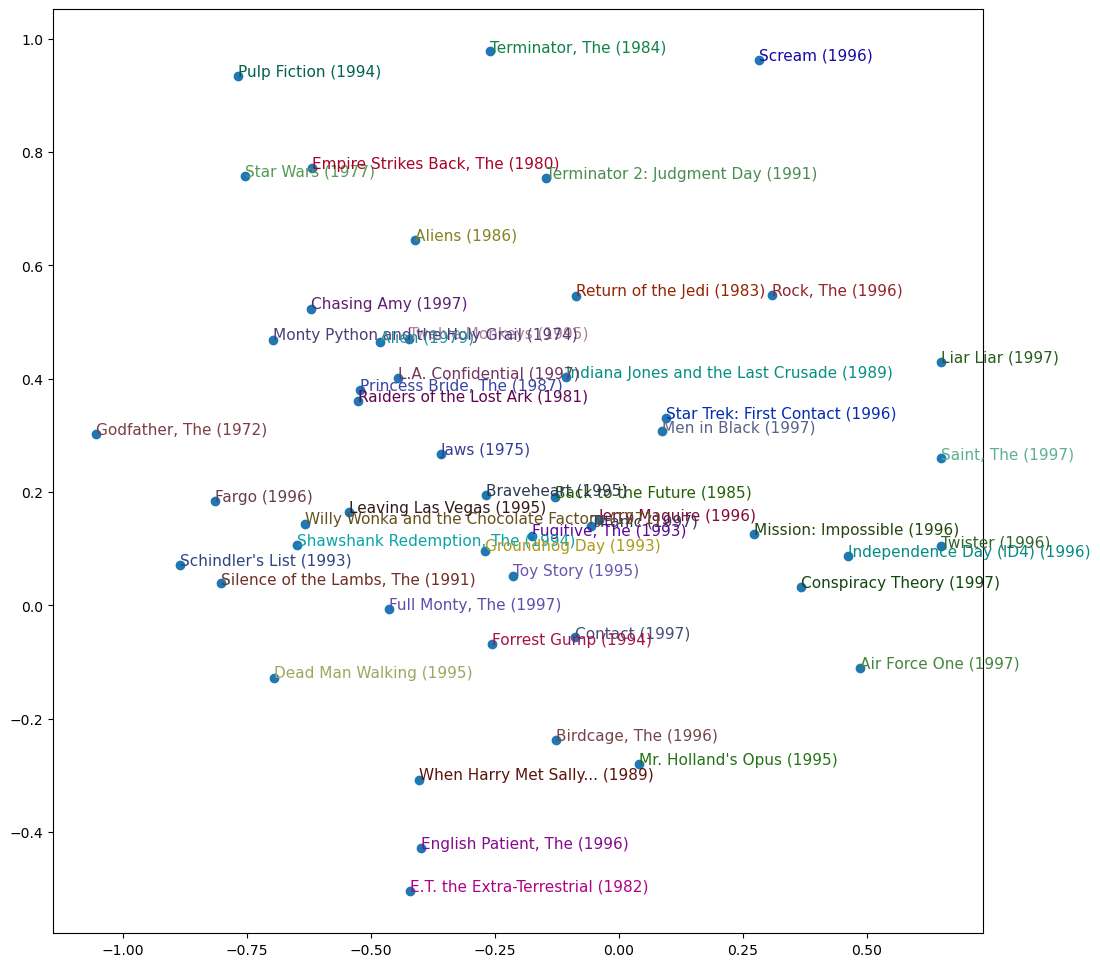

In [61]:
plt.figure(figsize = (12, 12))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idx], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [62]:
learn = collab_learner(dls, n_factors = 50, y_range = (0, 5.5))

In [63]:

learn.fit_one_cycle(5, 5e-3, wd = 0.1)

epoch,train_loss,valid_loss,time
0,0.906959,0.945110,00:11
1,0.865366,0.863662,00:14
2,0.745408,0.822525,00:14
3,0.569507,0.816422,00:14
4,0.467960,0.817024,00:15


In [64]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [65]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending = True)[:5]
[dls.classes['title'][i] for i in idxs]

['Shawshank Redemption, The (1994)',
 'Titanic (1997)',
 "Schindler's List (1993)",
 'L.A. Confidential (1997)',
 'Star Wars (1977)']